<a href="https://colab.research.google.com/github/vnevzorovaa/cs102/blob/homework06/nevzorova_python_%2B_sql_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

In [64]:
%load_ext rpy2.ipython

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [5]:
import pandas as pd 
from google.colab import drive 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pprint as pp

In [6]:
#пример
a = 1
b = 2

a 
b 

2

In [7]:
# пример с датафреймом

cc = pd.DataFrame({'a' : [1, 2, 3], 'b': [2, 4, 6], 'c': [10, 11, 12]})
cc

,a,b,c
0,1,2,10
1,2,4,11
2,3,6,12


In [12]:
drive.mount('/content/drive') # подключаемся к гугл драйву 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
drive.mount('/content/drive') # подключаемся к гугл драйву 
dt_old = pd.read_csv('/content/drive/MyDrive/music_genre.csv.zip')
dt = dt_old.sample(20000) 


sns.set_palette("flare") # запуск сиборна
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
ser = dt.duplicated() 
pp.pprint(ser[ser == True]) 
dt.drop(ser[ser == True].index, inplace=True) 


10004    True
dtype: bool


In [ ]:
# ищем artist_name – empty_field
e_f = dt.loc[dt['artist_name'] == 'empty_field'].index # получаем лист индексов
pp.pprint(len(e_f))
dt.drop(e_f, inplace=True)

0


In [15]:
# проверка 

pp.pprint(dt.duplicated()[dt.duplicated() == True])
pp.pprint(dt.loc[dt['artist_name'] == 'empty_field'].index)

Series([], dtype: bool)
Int64Index([ 6390,  2372, 35833,  6770, 22053, 25992, 30097, 22386, 16356,
            20536,
            ...
            32120, 23400, 20214, 44365, 32482, 46214, 38004, 47378, 19212,
            32293],
           dtype='int64', length=955)


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [16]:
dt.sample() 

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
36830,63152.0,flor,warm blood,57.0,0.0119,0.561,-1.0,0.786,0.00217,D#,0.0798,-4.791,Major,0.0292,142.088,4-Apr,0.465,Rock


In [17]:
dt.music_genre.value_counts(normalize=True)

Hip-Hop        0.10216
Blues          0.10176
Electronic     0.10101
Rock           0.10036
Rap            0.10031
Anime          0.10006
Classical      0.09936
Jazz           0.09901
Alternative    0.09886
Country        0.09711
Name: music_genre, dtype: float64

In [ ]:
plt.figure(figsize=(11, 6))
plt.title(label='tracks by genre', fontdict={'fontsize': 15})
color = ['orangered'] + ['lightgrey'] *9
plt.ylim(1800, 2000)
data = pd.DataFrame(dt.music_genre.value_counts())
sns.barplot(x=data.music_genre, y=data.index, palette=color)

In [18]:
dt.groupby(['music_genre']).apply(lambda x: x['danceability'].mean()).idxmax()

'Hip-Hop'

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [65]:
dt['artist_name'].value_counts(ascending=True).to_frame().head(1)

,artist_name
Jon Bon Jovi,1


In [20]:
dt['artist_name'].value_counts(ascending=False).to_frame().head(1)

,artist_name
empty_field,955


['Moby', '$uicideBoy$', 'Mac Miller', 'Kevin Gates', 'ASIAN KUNG-FU GENERATION', 'Logic', 'Pyotr Ilyich Tchaikovsky', 'Thievery Corporation', 'The Black Keys', 'Future', 'Eminem', 'Yuki Hayashi', 'Drake', 'Capcom Sound Team', 'Frédéric Chopin', 'Johann Sebastian Bach', 'Ludwig van Beethoven', 'Nobuo Uematsu', 'Wolfgang Amadeus Mozart', 'empty_field']
[37, 37, 37, 38, 39, 40, 44, 45, 50, 50, 53, 68, 76, 78, 95, 120, 132, 154, 168, 955]


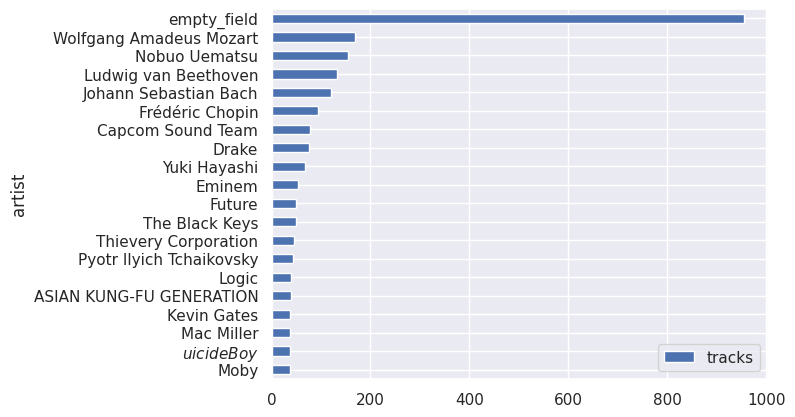

In [66]:
artists = {}
for artist in dt['artist_name'].unique():
    artists[artist] = len(dt[dt['artist_name'] == artist])
sorted_artists = dict(sorted(artists.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_artists)[:20]
names.reverse()
tracks = list(sorted_artists.values())[:20]
tracks.reverse()
artists_dt = pd.DataFrame({"artist": names, "tracks": tracks})
artists_dt.plot.barh(x="artist", y="tracks")

print(names)
print(tracks)

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [68]:
features = dt.iloc[:, 1:]
features.corr()

<ipython-input-68-52deaa450bb7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.293450,0.359022,-0.077309,0.213220,-0.367906,-0.043076,0.317131,0.223470,0.126830
acousticness,-0.293450,1.000000,-0.345198,0.058424,-0.790848,0.373270,-0.103200,-0.727504,-0.165636,-0.266939
danceability,0.359022,-0.345198,1.000000,-0.151069,0.255982,-0.300115,-0.052664,0.390199,0.281884,0.429600
duration_ms,-0.077309,0.058424,-0.151069,1.000000,-0.067223,0.121599,0.018934,-0.100943,-0.085644,-0.127624
energy,0.213220,-0.790848,0.255982,-0.067223,1.000000,-0.380112,0.183673,0.835580,0.155505,0.387028
instrumentalness,-0.367906,0.373270,-0.300115,0.121599,-0.380112,1.000000,-0.090992,-0.523863,-0.198869,-0.262941
liveness,-0.043076,-0.103200,-0.052664,0.018934,0.183673,-0.090992,1.000000,0.126021,0.115900,0.043550
loudness,0.317131,-0.727504,0.390199,-0.100943,0.835580,-0.523863,0.126021,1.000000,0.166253,0.337480
speechiness,0.223470,-0.165636,0.281884,-0.085644,0.155505,-0.198869,0.115900,0.166253,1.000000,0.051244
valence,0.126830,-0.266939,0.429600,-0.127624,0.387028,-0.262941,0.043550,0.337480,0.051244,1.000000


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

In [82]:
import plotly.express as px
import pandas as pd

dt = pd.read_csv('/content/drive/MyDrive/music_genre.csv.zip')
fig = px.box(x=dt['popularity'], y=dt['music_genre'])
fig.show()


### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

In [88]:
import plotly.express as px

top_genres = dt.groupby('music_genre')['popularity'].sum().nlargest(3).index.tolist()

grouped_data = dt.groupby('music_genre').apply(lambda x: x[x['popularity'] == x['popularity'].max()])
filtered_data = grouped_data[grouped_data.index.get_level_values(0).isin(top_genres)]

filtered_data = filtered_data.reset_index(drop=True)

artist_data = filtered_data.groupby(['music_genre', 'artist_name'])['popularity'].sum().reset_index()

fig = px.pie(artist_data, values='popularity', names='artist_name', hole=.3)
fig.show()


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
import pandas as pd

top_genre = dt.groupby('music_genre')['popularity'].sum().nlargest(1).index.tolist()[0]
print(top_genre)
not_top_genre = dt.groupby('music_genre')['popularity'].sum().nsmallest(1).index.tolist()[0]
print(not_top_genre)

top_dt = dt.loc[dt['music_genre'] == top_genre, dt.columns[1:]].drop(["duration_ms", "popularity"], axis=1)
print(top_dt)

not_top_dt = dt.loc[dt['music_genre'] == not_top_genre, dt.columns[1:]].drop(["duration_ms", "popularity"], axis=1)
print(not_top_dt)


<ipython-input-92-667ddf0c7d0a>:12: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-92-667ddf0c7d0a>:20: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



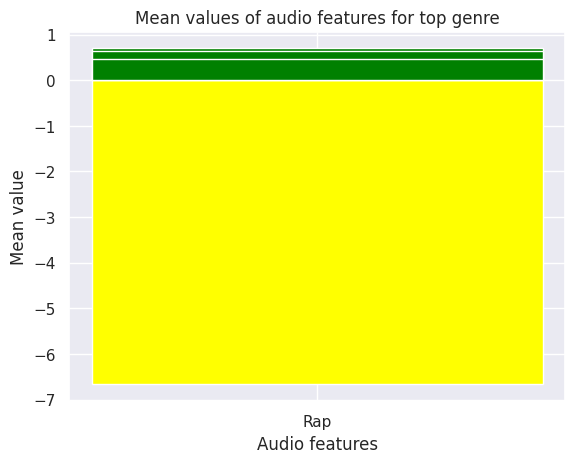

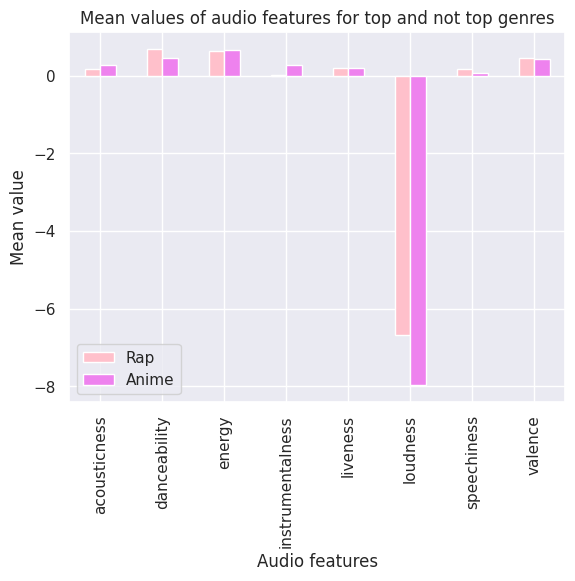

In [92]:
import matplotlib.pyplot as plt

# Find top and not top genre
top_genre = dt.groupby('music_genre')['popularity'].sum().nlargest(1).index[0]
not_top_genre = dt.groupby('music_genre')['popularity'].sum().nsmallest(1).index[0]

# Filter dataframes by genre and drop unnecessary columns
top_dt = dt[dt['music_genre'] == top_genre].iloc[:, 1:].drop(["duration_ms", "popularity"], axis=1)
not_top_dt = dt[dt['music_genre'] == not_top_genre].iloc[:, 1:].drop(["duration_ms", "popularity"], axis=1)

# Create bar plot for top genre
top_mean = top_dt.mean()
colors = ["green" if x > 0 else "yellow" for x in top_mean]
plt.bar(x=top_genre, height=top_mean, color=colors)
plt.title("Mean values of audio features for top genre")
plt.xlabel("Audio features")
plt.ylabel("Mean value")

# Create bar plot for top and not top genres
not_top_mean = not_top_dt.mean()
two_genres = pd.DataFrame({top_genre: top_mean, not_top_genre: not_top_mean})
two_genres.plot.bar(color=["pink", "violet"])
plt.title("Mean values of audio features for top and not top genres")
plt.xlabel("Audio features")
plt.ylabel("Mean value")

plt.show()


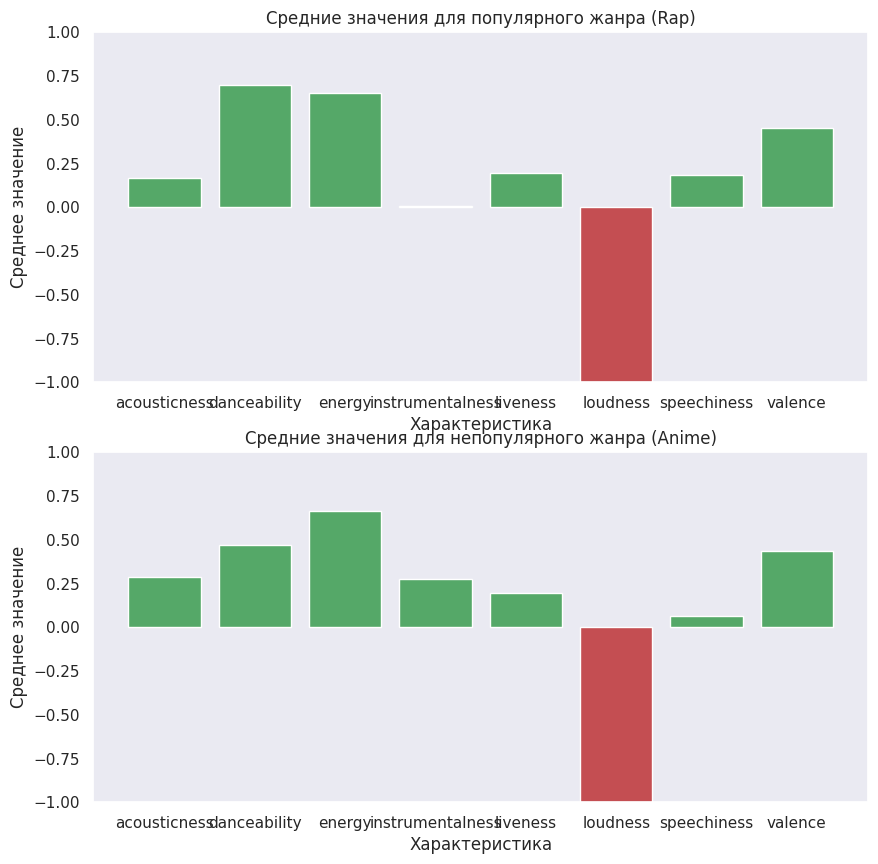

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Получение самого популярного и непопулярного жанров
popular_genre = dt.groupby('music_genre')['popularity'].mean().idxmax()
unpopular_genre = dt.groupby('music_genre')['popularity'].mean().idxmin()

# Получение средних значений для жанров по интересующим нас характеристикам
characteristics = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
popular_means = dt[dt['music_genre'] == popular_genre][characteristics].mean()
unpopular_means = dt[dt['music_genre'] == unpopular_genre][characteristics].mean()

# Графическое представление данных
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].bar(characteristics, popular_means, color=np.where(popular_means < 0, 'r', 'g'))
axes[0].set_title(f"Средние значения для популярного жанра ({popular_genre})")
axes[0].set_ylim([-1, 1])

axes[1].bar(characteristics, unpopular_means, color=np.where(unpopular_means < 0, 'r', 'g'))
axes[1].set_title(f"Средние значения для непопулярного жанра ({unpopular_genre})")
axes[1].set_ylim([-1, 1])

# Установить метки осей и заголовки
for ax in axes.flat:
    ax.set(xlabel='Характеристика', ylabel='Среднее значение')
    ax.grid()

plt.show()


### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [102]:
dt["длительность_трека"] = ""
for row in dt.itertuples():
  if row[7] / 60000 <= 3:
    dt.at[row[0], 'длительность_трека'] = 'короткая'
  elif row[7] / 60000 <= 5:
    dt.at[row[0], 'длительность_трека'] = 'средняя'
  else:
    dt.at[row[0], 'длительность_трека'] = 'длинная'
dt



,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,короткая
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,средняя
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,средняя
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,короткая
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,средняя
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop,короткая
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop,средняя
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop,средняя
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop,средняя


<Axes: xlabel='loudness', ylabel='Density'>

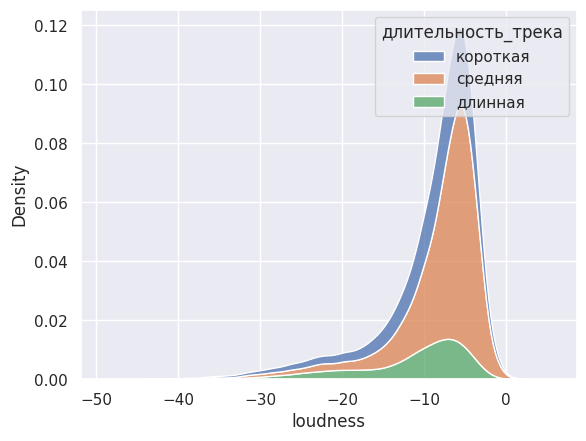

In [105]:
sns.kdeplot(data=dt, x="loudness", hue="длительность_трека", multiple='stack')

In [110]:
groups = [dt[dt['длительность_трека'] == x].shape[0] for x in set(dt['длительность_трека'])]
groups

[7981, 28432, 13592]

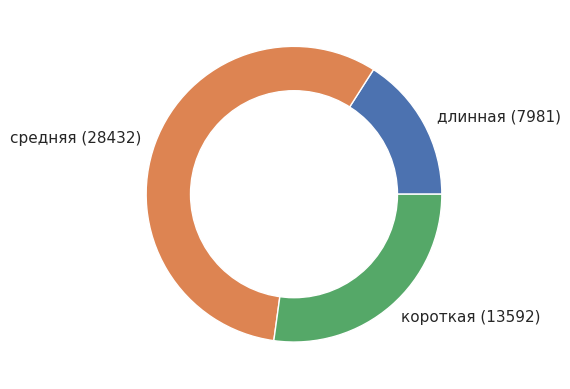

In [111]:
fig, ax = plt.subplots()

groups = [dt[dt.длительность_трека == x].shape[0] for x in set(list(dt["длительность_трека"]))]
labels = [f"{label} ({count})" for label, count in zip(set(list(dt["длительность_трека"])), groups)]

ax.pie(groups, labels=labels)

# Add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]

In [44]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:") 
cur = con.cursor() 
drive.mount('/content/drive') 
dt_sql = pd.read_csv('/content/drive/MyDrive/music_genre.csv.zip') 
dt_sql.to_sql('music_genre', con, index=False)

cur.execute(
'''select count(*) from music_genre;
  
'''
)
cur.fetchall()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[(50005,)]

In [ ]:
# 1.4 - строки

cur.execute(
    '''select * from music_genre
where artist_name = 'empty_field' ''' 
)
cur.fetchall()

In [46]:
# 1.4 delete
cur.execute(
    '''delete from music_genre
where artist_name = 'empty_field' ''' 
)
cur.fetchall()

[]

In [120]:
# 2.1 
cur.execute(
    '''select distinct music_genre, 
round(count(music_genre) * 100 / (select count(*) from music_genre) , 2)
from music_genre mg where not music_genre = ''
group by music_genre'''
)
cur.fetchall()

 

[('Alternative', 9.0),
 ('Anime', 9.0),
 ('Blues', 9.0),
 ('Classical', 9.0),
 ('Country', 10.0),
 ('Electronic', 10.0),
 ('Hip-Hop', 10.0),
 ('Jazz', 10.0),
 ('Rap', 9.0),
 ('Rock', 10.0)]

In [52]:
# 2.3
cur.execute(
    '''select music_genre, avg(danceability) as a_d
from music_genre mg where not music_genre = ''
group by music_genre
order by a_d desc;''' 
)
cur.fetchall()

[('Hip-Hop', 0.7174176656151441),
 ('Rap', 0.6971697276757421),
 ('Electronic', 0.6189617333054215),
 ('Jazz', 0.5850268343815513),
 ('Country', 0.5776949152542363),
 ('Alternative', 0.5415083121827418),
 ('Rock', 0.538589281210594),
 ('Blues', 0.5288824025289791),
 ('Anime', 0.4707623942470392),
 ('Classical', 0.30631396282213846)]

In [53]:
# 2.4 
cur.execute(
    '''select music_genre, "mode", count("mode") cum
from music_genre mg where not music_genre = ''
group by music_genre, "mode"
order by music_genre;''' 
)
cur.fetchall()



[('Alternative', 'Major', 3000),
 ('Alternative', 'Minor', 1728),
 ('Anime', 'Major', 2915),
 ('Anime', 'Minor', 1813),
 ('Blues', 'Major', 3379),
 ('Blues', 'Minor', 1366),
 ('Classical', 'Major', 3147),
 ('Classical', 'Minor', 1587),
 ('Country', 'Major', 4164),
 ('Country', 'Minor', 615),
 ('Electronic', 'Major', 2571),
 ('Electronic', 'Minor', 2206),
 ('Hip-Hop', 'Major', 2635),
 ('Hip-Hop', 'Minor', 2120),
 ('Jazz', 'Major', 2527),
 ('Jazz', 'Minor', 2243),
 ('Rap', 'Major', 2626),
 ('Rap', 'Minor', 2111),
 ('Rock', 'Major', 3521),
 ('Rock', 'Minor', 1237)]

In [130]:
#3.1
cur.execute(
    '''select artist_name, count(artist_name) c_a
from music_genre
group by artist_name
order by c_a desc
limit 1;''')
print(cur.fetchall())

cur.execute(
    '''select artist_name, count(artist_name) c_a
from music_genre where artist_name <> 'None'
group by artist_name
order by c_a asc
limit 1;''')
cur.fetchall()


[('Nobuo Uematsu', 429)]


[('"Weird Al" Yankovic', 1)]

In [60]:
# 3.2 
cur.execute(
    ''' select artist_name, count(artist_name) c_a
from music_genre
group by artist_name
order by c_a desc
limit 20; ''' 
)
cur.fetchall()


[('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90),
 ('ASIAN KUNG-FU GENERATION', 89)]

In [113]:
# 8.1.1
cur.execute(
    ''' ALTER TABLE music_genre 
ADD song_length varchar; ''' 
)
cur.fetchall()


[]

In [114]:
# 8.1.2
cur.execute(
    ''' UPDATE music_genre
SET song_length =
        CASE WHEN duration_ms <= 180000
            THEN 'short'
            when duration_ms > 180000 and
            	duration_ms <= 300000
            then 'average'
            ELSE 'long'
        end; ''' 
)
cur.fetchall()


      

[]

In [63]:
# 8.3
cur.execute(
    ''' select song_nength, count(song_nength)
from music_genre mg 
group by song_nength; ''' 
)
cur.fetchall()


[('average', 27009), ('long', 7583), ('short', 12924)]